In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.listdir("drive/My Drive/Colab Notebooks/Customer Profiling")

['.ipynb_checkpoints',
 'superstore_dataset.csv',
 'rfm.csv',
 'link for reference projects.gdoc',
 'result_sort_with_return.gsheet',
 'result_sort_with_return.csv',
 'sorted_rfm_with_qnty.csv',
 'images',
 'Customer Profiling.ipynb']

In [3]:
!pip install squarify

In [4]:
!pip install geopandas

     |████████████████████████████████| 931kB 6.3MB/s 
     |████████████████████████████████| 10.9MB 23.0MB/s 
     |████████████████████████████████| 14.7MB 211kB/s 


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import json

pd.options.display.float_format = '{:,.2f}'.format

import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/Customer Profiling/superstore_dataset.csv',encoding='ISO-8859-1')

df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df = df.drop(['row_id', 'ship_date', 'customer_name', 'postal_code', 'shipping_cost', 'order_priority'], axis=1)
df['order_date'] = pd.to_datetime(df['order_date'])

# Analysis as of: 2015-01-31 (max order date in the dataset: 2014-12-31)
today = datetime.strptime('2015-01-31', '%Y-%m-%d')

In [7]:
df.head()

,order_id,order_date,ship_mode,customer_id,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,AG-2011-2040,2011-01-01,Standard Class,TB-11280,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14
1,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04
2,HU-2011-1220,2011-01-01,Second Class,AT-735,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64
3,IT-2011-3647632,2011-01-01,Second Class,EM-14140,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05
4,IN-2011-47883,2011-01-01,Standard Class,JH-15985,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77


In [8]:
print(9%3)

0


In [9]:
import datetime
from datetime import timedelta
import random

result_sort=df.sort_values(by=['customer_id'], ascending=[True])
print(result_sort['order_date'])
result_sort['return_date']=None
result_sort['return_quantity']=0
date_diff=np.random.randint(low=5, high=35, size=100)
return_quatity_count=np.random.randint(low=0, high=14, size=14)
print("TYPE IS : ", type(date_diff[1]))
random_number=[4,7,13,11,8,3]
for i in range (0,len(result_sort)-1):
  if i%3!=0:
    # print("i is : ",i)
    order_date = str(result_sort['order_date'].iloc[i])
    orderdate_as_date=datetime.datetime.strptime(order_date, '%Y-%m-%d 00:00:00').date()
    #print("ORDER IS : ",orderdate_as_date)
    random.shuffle(date_diff)
    random.shuffle(return_quatity_count)
    diff=int(date_diff[i%len(date_diff)])
    #print("DIFF IS : ",diff)
    EndDate = orderdate_as_date+ datetime.timedelta(days=int(diff))
    #print("END DATE IS : ",EndDate)
    result_sort['return_date'].iloc[i]=EndDate
    qty_diff=abs(result_sort['quantity'].iloc[i]-int(return_quatity_count[i%len(return_quatity_count)]))
    if (qty_diff > result_sort['quantity'].iloc[i]):
      result_sort['return_quantity'].iloc[i]=result_sort['quantity'].iloc[i]
    else:
      result_sort['return_quantity'].iloc[i]=qty_diff
    random.shuffle(date_diff)
    random.shuffle(return_quatity_count)
    # print(i)







39308   2014-06-24
16595   2014-07-01
16593   2014-07-01
15138   2014-04-08
15184   2014-04-08
           ...    
19640   2014-12-06
9111    2013-04-04
10061   2013-06-05
6030    2012-07-12
38901   2013-04-24
Name: order_date, Length: 51290, dtype: datetime64[ns]
TYPE IS :  <class 'numpy.int64'>


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#result_sort.to_csv('drive/My Drive/Colab Notebooks/Customer Profiling/result_sort_with_return.csv',index=False)
print(len(result_sort['return_date'].unique()))
#sizes = df_rfm.groupby('rfm_label')['monetary'].sum()

print((result_sort['quantity'].unique()))
print((result_sort['return_quantity'].unique()))




print(min(result_sort['order_date']))
StartDate=min(result_sort['order_date'])
order_date = str(max(result_sort['order_date']))
orderdate_as_date=datetime.datetime.strptime(order_date, '%Y-%m-%d 00:00:00').date()
EndDate = orderdate_as_date+ datetime.timedelta(days=35)
print(EndDate)

1486
[ 2  5  3  1  7 13  4  8  6  9 12 10 14 11]
[ 0  4  3  2  1  5  6  8 13  7  9 11 12 10]
2011-01-01 00:00:00
2015-02-04


In [11]:
 
dRan2 = pd.date_range(start ='2011-01-01',  end ='2015-02-04', freq ='3M') 
print(dRan2)

DatetimeIndex(['2011-01-31', '2011-04-30', '2011-07-31', '2011-10-31',
               '2012-01-31', '2012-04-30', '2012-07-31', '2012-10-31',
               '2013-01-31', '2013-04-30', '2013-07-31', '2013-10-31',
               '2014-01-31', '2014-04-30', '2014-07-31', '2014-10-31',
               '2015-01-31'],
              dtype='datetime64[ns]', freq='3M')


In [12]:
agg_dict1 = {
    'order_id': 'count',
    'order_date': 'max',
    'sales': 'sum'
}
df_rfm = df.groupby('customer_id').agg(agg_dict1).reset_index()
print(df_rfm)
df_rfm.columns = ['customer_id', 'frequency', 'max_date', 'monetary']
# print((today - df_rfm['max_date']).dt.days)
df_rfm['recency'] = (today - df_rfm['max_date']).dt.days
print(df_rfm['frequency'])
print(df_rfm['recency'])
df_rfm.drop(['max_date'], axis=1, inplace=True)

     customer_id  order_id order_date     sales
0       AA-10315        42 2014-12-23 13,747.41
1       AA-10375        42 2014-12-25  5,884.20
2       AA-10480        38 2014-09-05 17,695.59
3       AA-10645        73 2014-12-05 15,343.89
4         AA-315         8 2014-12-29  2,243.26
...          ...       ...        ...       ...
1585    YS-21880        54 2014-12-22 18,703.61
1586    ZC-11910         1 2014-06-14      7.17
1587    ZC-21910        84 2014-12-28 28,472.82
1588    ZD-11925        18 2014-12-28  2,951.23
1589    ZD-21925        36 2014-12-30  9,479.34

[1590 rows x 4 columns]
0       42
1       42
2       38
3       73
4        8
        ..
1585    54
1586     1
1587    84
1588    18
1589    36
Name: frequency, Length: 1590, dtype: int64
0        39
1        37
2       148
3        57
4        33
       ... 
1585     40
1586    231
1587     34
1588     34
1589     32
Name: recency, Length: 1590, dtype: int64


In [13]:
agg_dict1

{'order_date': 'max', 'order_id': 'count', 'sales': 'sum'}

In [14]:
df_rfm['recency']

0        39
1        37
2       148
3        57
4        33
       ... 
1585     40
1586    231
1587     34
1588     34
1589     32
Name: recency, Length: 1590, dtype: int64

In [0]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q=5, labels=f_labels).astype(int)
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)

df_rfm['rfm_sum'] = df_rfm['r_score'] + df_rfm['f_score'] + df_rfm['m_score']

def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant loose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

customer_id
AA-10315    145
AA-10375    139
AA-10480    150
AA-10645    267
AA-315       20
           ... 
YS-21880    197
ZC-11910      1
ZC-21910    333
ZD-11925     55
ZD-21925    119
Name: quantity, Length: 1590, dtype: int64
customer_id
AA-10315     74
AA-10375     64
AA-10480     55
AA-10645    133
AA-315       14
           ... 
YS-21880     76
ZC-11910      1
ZC-21910    124
ZD-11925     25
ZD-21925     54
Name: return_quantity, Length: 1590, dtype: int64
rfm_label
about to sleep         1002
at risk                8812
cant loose them        4967
champions             19326
hibernating            4603
loyal customers       30789
needing attention      3216
new customers           188
potential loyalist     7741
promising               316
Name: return_individual_cust_qnty, dtype: int64
rfm_label
about to sleep         2083
at risk               19456
cant loose them       10837
champions             43495
hibernating            9503
loyal customers       68006
needing attenti

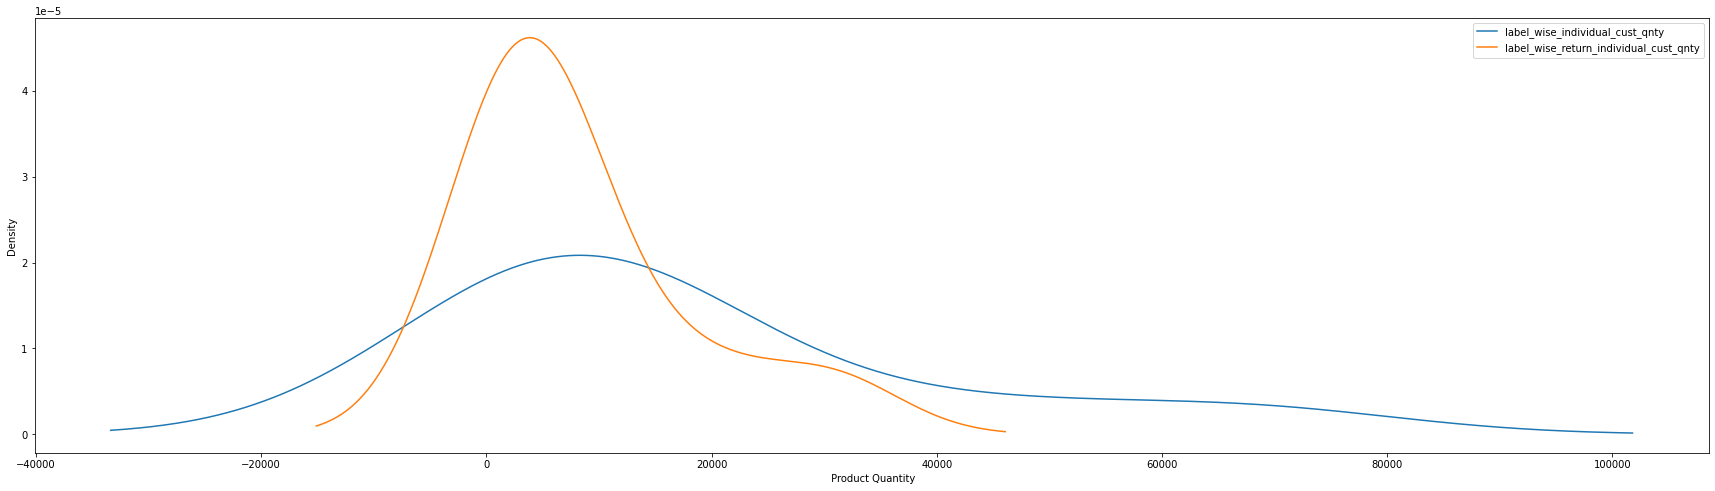

In [16]:
individual_cust_qnty=result_sort.groupby('customer_id')['quantity'].sum()
return_individual_cust_qnty=result_sort.groupby('customer_id')['return_quantity'].sum()

se = pd.Series(individual_cust_qnty)
de=pd.Series(return_individual_cust_qnty)

print((individual_cust_qnty))
print((return_individual_cust_qnty))
result_rfm=df_rfm.sort_values(by=['customer_id'], ascending=[True])
result_rfm
result_rfm['individual_cust_qnty']=list(se)
result_rfm['return_individual_cust_qnty']=list(de)
result_rfm

label_wise_individual_cust_qnty=result_rfm.groupby('rfm_label')['individual_cust_qnty'].sum()
label_wise_return_individual_cust_qnty=result_rfm.groupby('rfm_label')['return_individual_cust_qnty'].sum()


print((label_wise_return_individual_cust_qnty))
print((label_wise_individual_cust_qnty))


labels = result_rfm['rfm_label'].unique()
sorted_labels=np.sort(labels, kind='mergesort')
print("labels is : ",type(labels))
df1=pd.DataFrame(index=sorted_labels,columns=['label_wise_individual_cust_qnty','label_wise_return_individual_cust_qnty'])

df1['label_wise_individual_cust_qnty']=list(label_wise_individual_cust_qnty)
df1['label_wise_return_individual_cust_qnty']=list(label_wise_return_individual_cust_qnty)
# df2=pd.DataFrame(np.random.rand(4,2),index=labels,columns=["I","J"])
ax = df1.plot(kind="density", stacked=True, figsize =[30,8]).get_figure().savefig('drive/My Drive/Colab Notebooks/Customer Profiling/images/density.png')
plt.xlabel(" Product Quantity")
plt.savefig('drive/My Drive/Colab Notebooks/Customer Profiling/images/density.png')
# #df1=df1.sort_values(by=index, ascending=[True])
# print(df1)




#result_sort=df.sort_values(by=['customer_id'], ascending=[True])
#result_rfm.to_csv('drive/My Drive/Colab Notebooks/Customer Profiling/sorted_rfm_with_qnty.csv',index=False)

In [17]:
print(result_rfm.loc[result_rfm['rfm_label']=='loyal customers'].head(5))




   customer_id  frequency  ...  individual_cust_qnty  return_individual_cust_qnty
3     AA-10645         73  ...                   267                          133
8     AB-10015         77  ...                   268                          137
9     AB-10060         57  ...                   232                          115
10    AB-10105         62  ...                   222                          108
11    AB-10150         47  ...                   180                           84

[5 rows x 11 columns]


              order_id order_date  ... return_date return_quantity
4615     ID-2012-25315 2012-04-01  ...  2012-04-10               5
6656     IN-2012-50886 2012-09-11  ...        None               0
6683     IN-2012-50886 2012-09-11  ...  2012-10-08               1
6702     IN-2012-50886 2012-09-11  ...  2012-10-06               3
14835    ID-2014-67357 2014-03-12  ...        None               0
...                ...        ...  ...         ...             ...
5275    MX-2012-111976 2012-05-12  ...  2012-05-31               4
9775    CA-2013-131205 2013-05-09  ...  2013-05-28               2
5271    MX-2012-111976 2012-05-12  ...        None               0
31147  ES-2012-3704890 2012-09-19  ...  2012-10-02               2
32328    IN-2013-79530 2013-05-20  ...  2013-06-08               4

[73 rows x 20 columns]


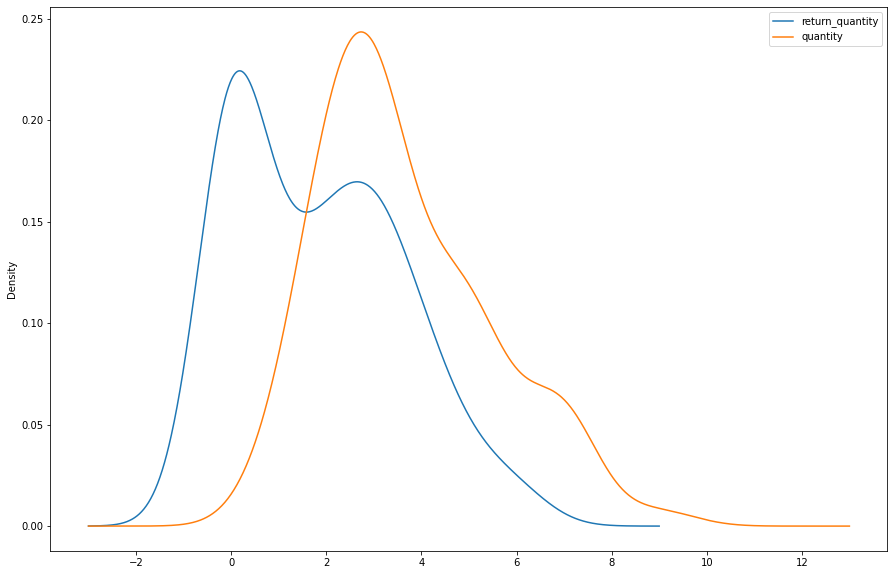

In [18]:
df_AA_10645=result_sort.loc[result_sort['customer_id']=='AA-10645']
print(df_AA_10645)
df_AA_10645_copy=pd.DataFrame()
df_AA_10645_copy['return_quantity'] = df_AA_10645['return_quantity']
df_AA_10645_copy['quantity']=df_AA_10645['quantity']
df_AA_10645_copy.plot(kind="density", stacked=True, figsize =[15,10])

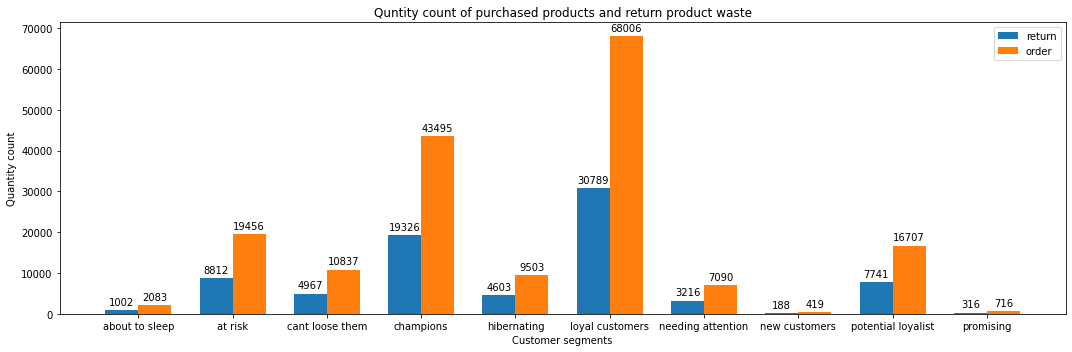

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = sorted_labels
cust_order_qnty=list(label_wise_return_individual_cust_qnty)
cust_return_qnty=list(label_wise_individual_cust_qnty)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, cust_order_qnty, width, label='return')
rects2 = ax.bar(x + width/2, cust_return_qnty, width, label='order')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantity count')
ax.set_xlabel('Customer segments')
ax.set_title('Quntity count of purchased products and return product waste')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig('drive/My Drive/Colab Notebooks/Customer Profiling/images/returnvsorderquntity.png')
plt.show()

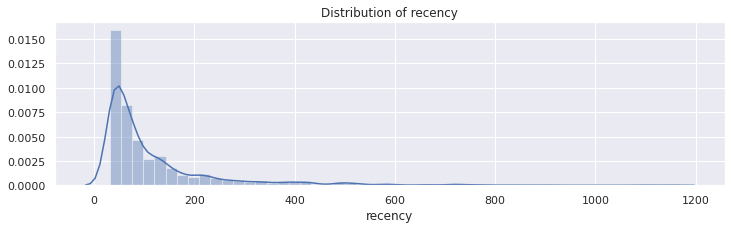

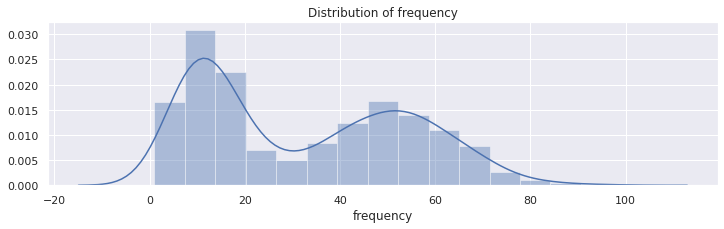

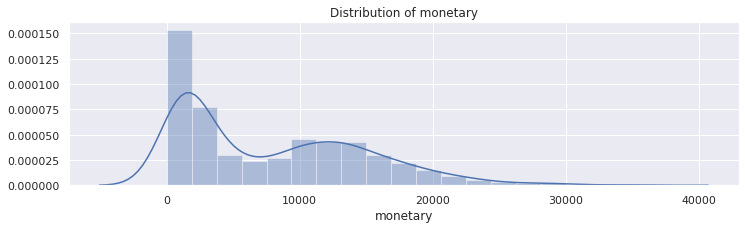

In [20]:
sns.set(font_scale=1)
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

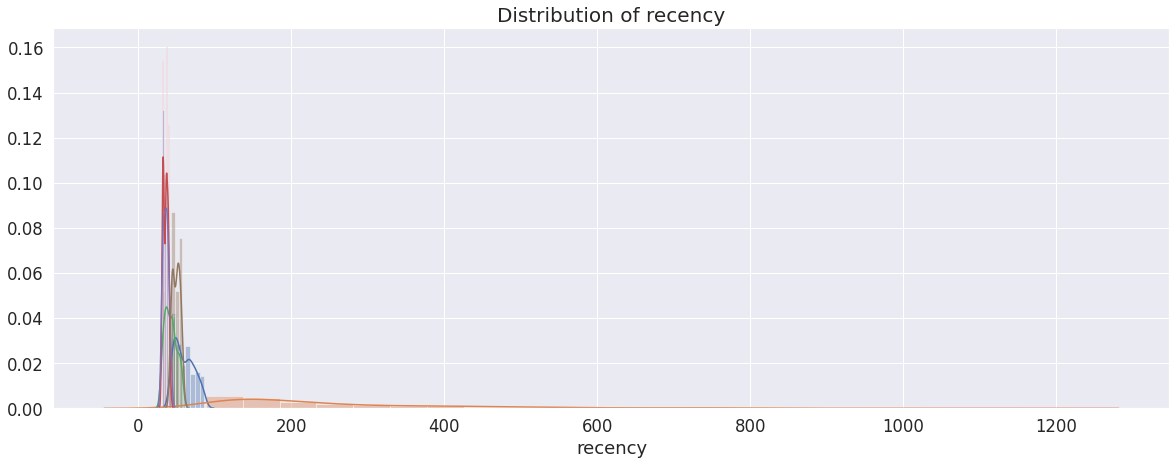

saving


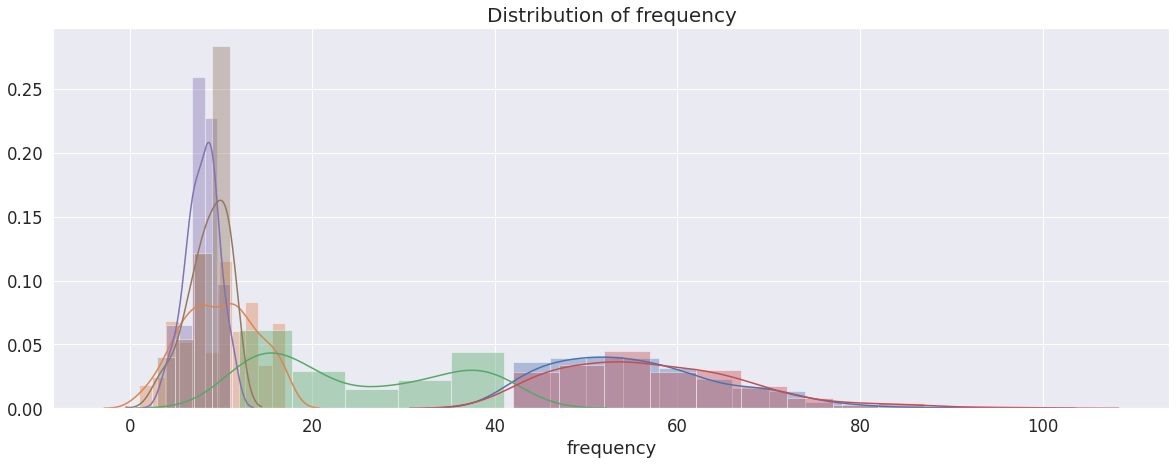

saving


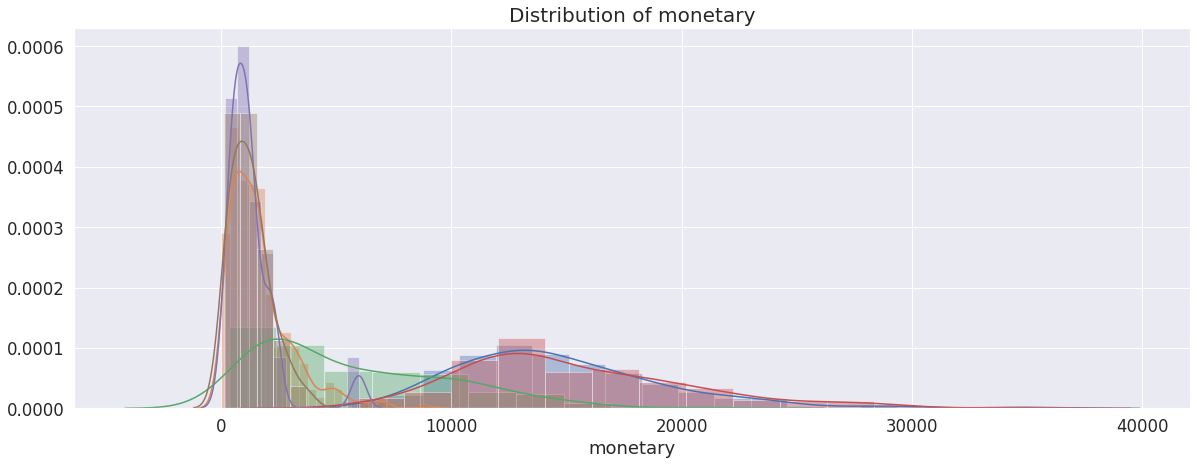

saving


In [21]:
sns.set(font_scale=1.5)
segments = ['loyal customers', 'hibernating', 'potential loyalist','champions', 'new customers', 'promising']

for col in colnames:
    fig, ax = plt.subplots(figsize=(20,7))
    for segment in segments:
        sns.distplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col,fontsize=20)
    # plt.legend()
    plt.show()
    print("saving")
    #plt.savefig('drive/My Drive/Colab Notebooks/Customer Profiling/images/Distribution_'+col+'.png')

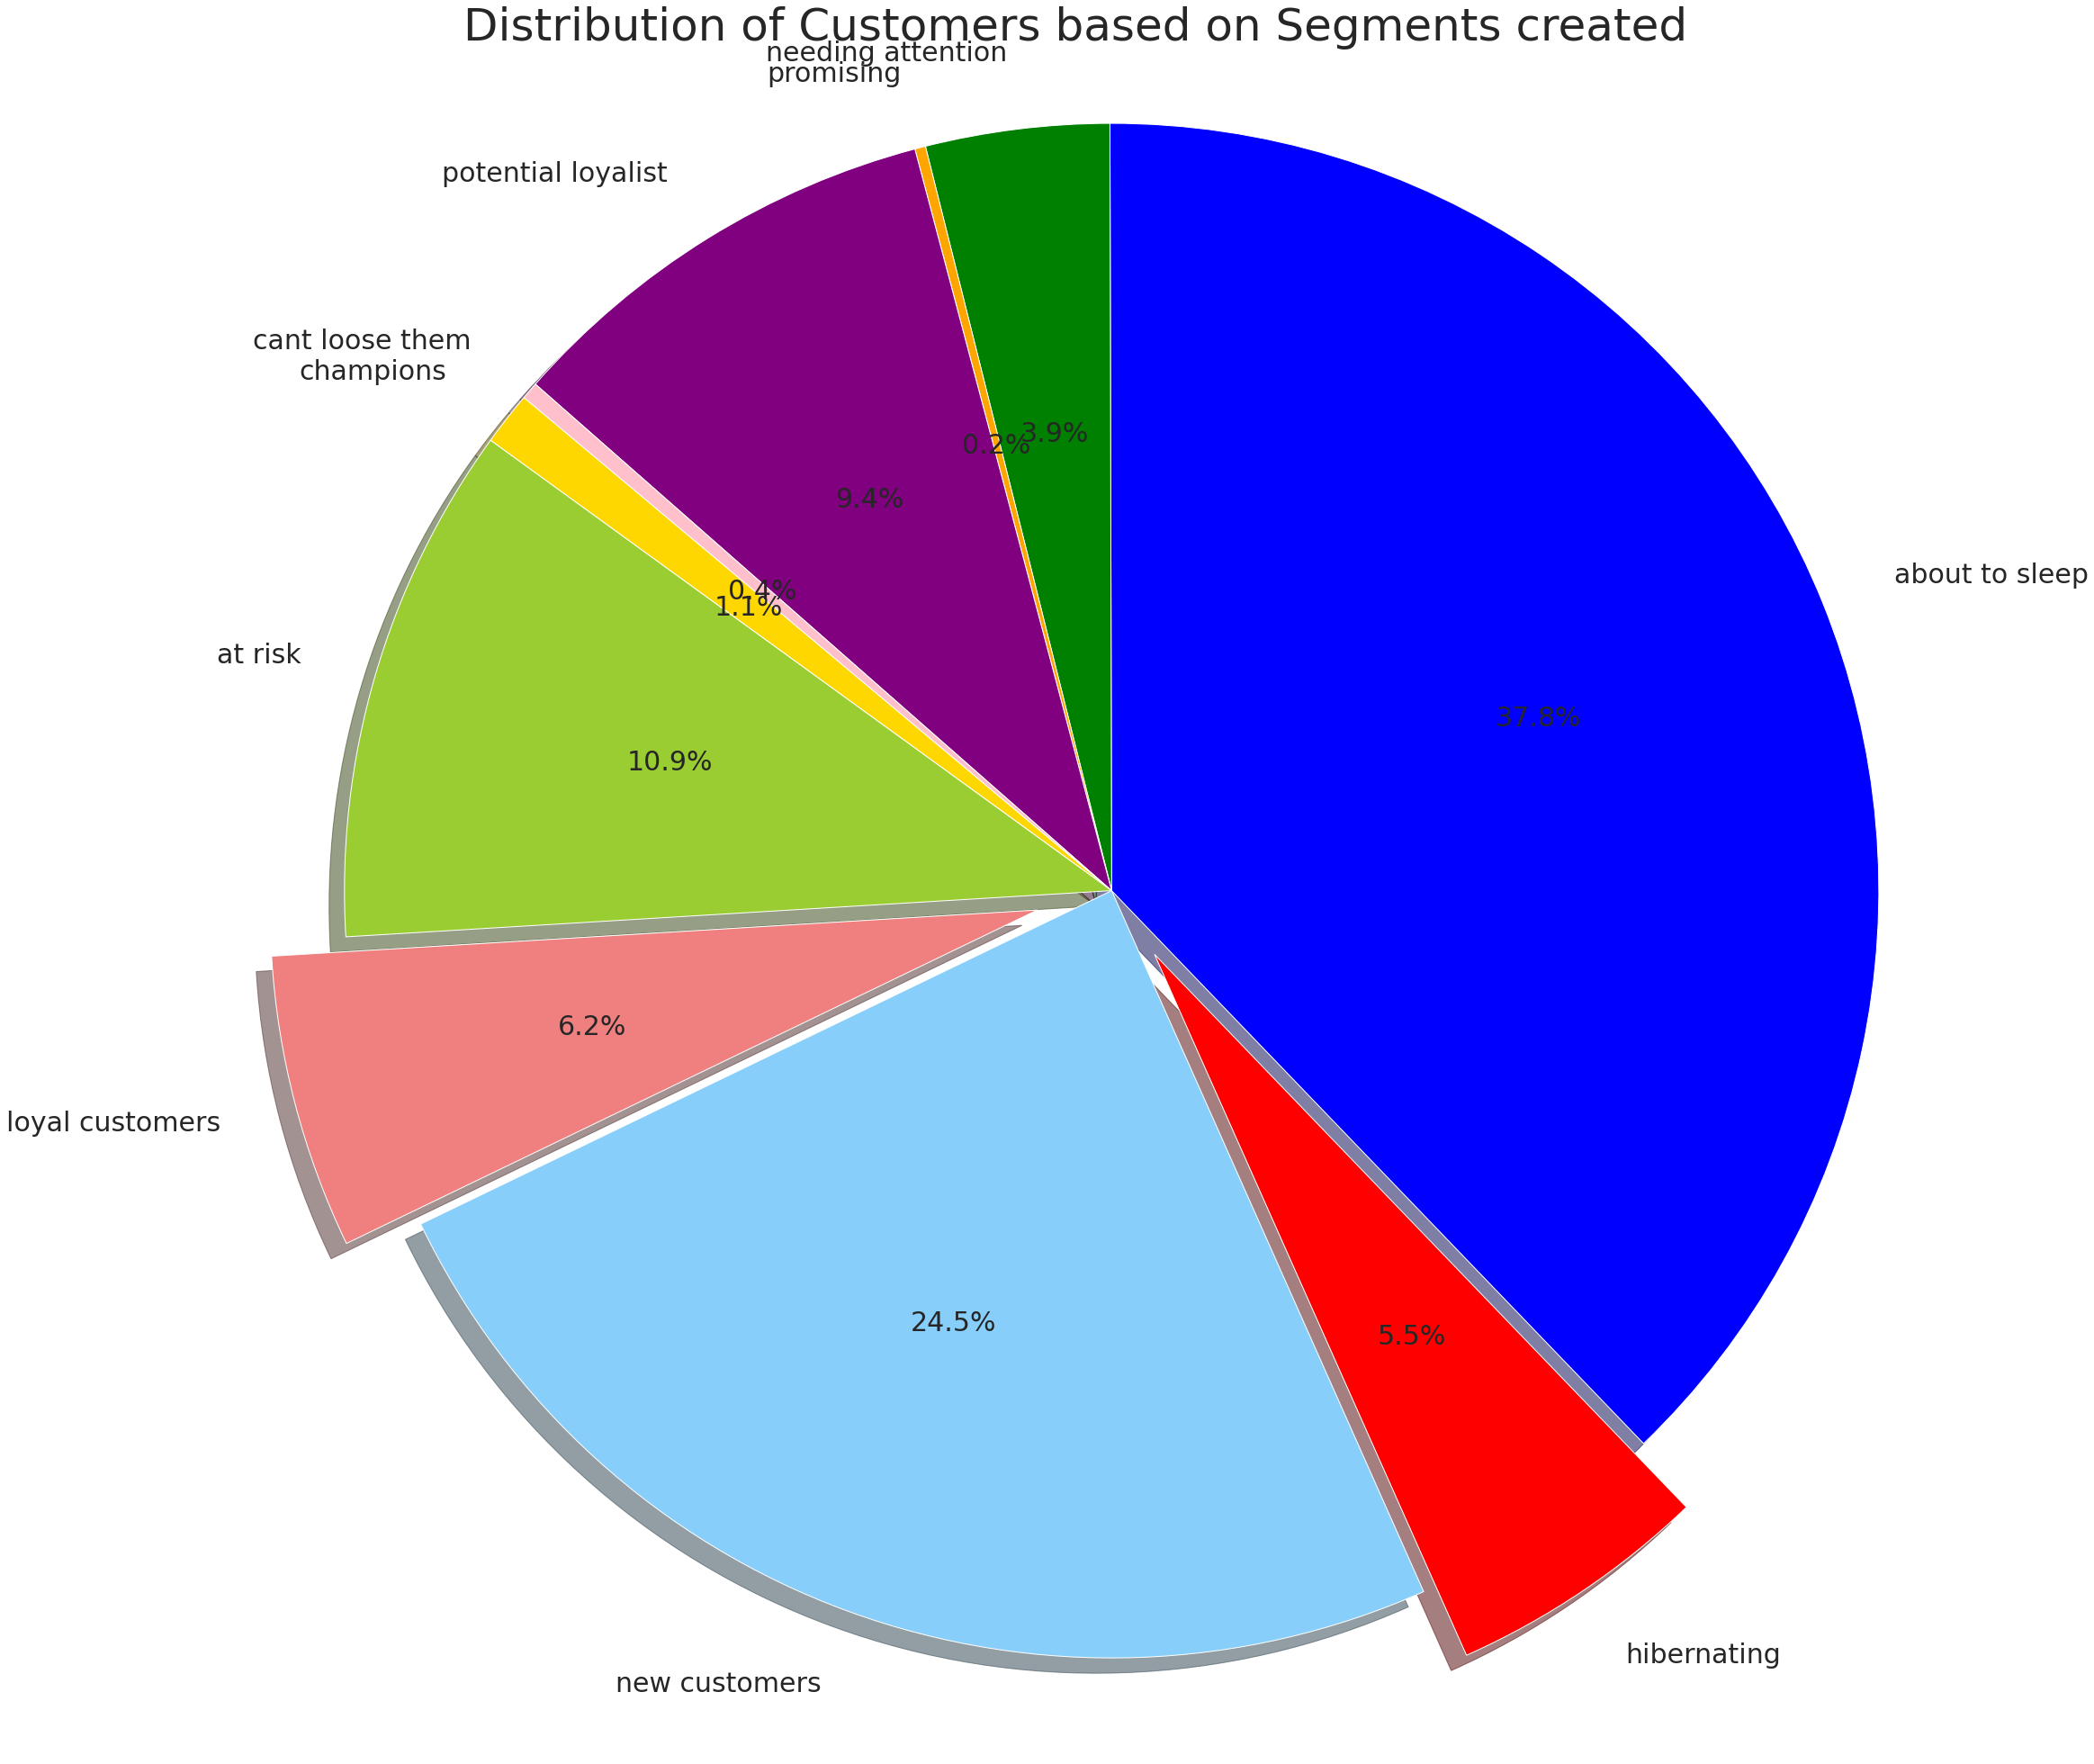

In [22]:
# import matplotlib.pyplot as plt

# Data to plot
labels = df_rfm['rfm_label'].unique()
sizes = df_rfm.groupby('rfm_label')['monetary'].sum()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red', 'blue', 'green', 'orange','purple', 'pink']
explode = (0, 0, 0.1, 0,0.1,0,0,0,0,0)  # explode 1st slice
fig1, ax1 = plt.subplots(figsize=(35,35))



# Plot
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,shadow=True, startangle=140,autopct='%1.1f%%',textprops={'fontsize': 30})
ax1.set_title("Distribution of Customers based on Segments created ",fontsize=50)
ax1.axis('equal')


plt.savefig('drive/My Drive/Colab Notebooks/Customer Profiling/images/piechart.png')
plt.show()

In [23]:
total_customer=labels = df_rfm['customer_id'].unique()
print(len(total_customer))
df_rfm['Total_scan_approved']=np.random.randint(845, size=len(total_customer))
print(df_rfm)

1590
     customer_id  frequency  ...           rfm_label  Total_scan_approved
0       AA-10315         42  ...           champions                  145
1       AA-10375         42  ...           champions                  548
2       AA-10480         38  ...             at risk                  337
3       AA-10645         73  ...     loyal customers                  317
4         AA-315          8  ...       new customers                  400
...          ...        ...  ...                 ...                  ...
1585    YS-21880         54  ...           champions                  528
1586    ZC-11910          1  ...         hibernating                   95
1587    ZC-21910         84  ...           champions                  496
1588    ZD-11925         18  ...  potential loyalist                  773
1589    ZD-21925         36  ...  potential loyalist                  109

[1590 rows x 10 columns]
